In [7]:
from datasets import load_dataset
import pandas as pd
from pathlib import Path

# Define project and data paths
PROJECT_ROOT = Path("..").resolve()  # assuming the notebook is in /notebooks
DATA_DIR = PROJECT_ROOT / "data"
RAW_DIR = DATA_DIR / "raw"

RAW_DIR.mkdir(parents=True, exist_ok=True)

PROJECT_ROOT, RAW_DIR


(PosixPath('/Users/bestalex/Desktop/ntu lecture/CA6000/000_ai_support_tickets'),
 PosixPath('/Users/bestalex/Desktop/ntu lecture/CA6000/000_ai_support_tickets/data/raw'))

In [8]:
# Load the customer support tickets dataset from Hugging Face
dataset_name = "Tobi-Bueck/customer-support-tickets"
ds = load_dataset(dataset_name)

# Inspect available splits (e.g. 'train', 'validation', 'test')
print(ds)

DatasetDict({
    train: Dataset({
        features: ['subject', 'body', 'answer', 'type', 'queue', 'priority', 'language', 'version', 'tag_1', 'tag_2', 'tag_3', 'tag_4', 'tag_5', 'tag_6', 'tag_7', 'tag_8'],
        num_rows: 61765
    })
})


In [9]:
# Choose a split to start with (often 'train'; adjust if the dataset uses different names)
split_name = "train"
df = ds[split_name].to_pandas()

# Quick sanity check
df.head()


,subject,body,answer,type,queue,priority,language,version,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8
0,Wesentlicher Sicherheitsvorfall,"Sehr geehrtes Support-Team,\n\nich möchte eine...",Vielen Dank für die Meldung des kritischen Sic...,Incident,Technical Support,high,de,51.0,Security,Outage,Disruption,Data Breach,None,None,None,None
1,Account Disruption,"Dear Customer Support Team,\n\nI am writing to...","Thank you for reaching out, <name>. We are awa...",Incident,Technical Support,high,en,51.0,Account,Disruption,Outage,IT,Tech Support,None,None,None
2,Query About Smart Home System Integration Feat...,"Dear Customer Support Team,\n\nI hope this mes...",Thank you for your inquiry. Our products suppo...,Request,Returns and Exchanges,medium,en,51.0,Product,Feature,Tech Support,None,None,None,None,None
3,Inquiry Regarding Invoice Details,"Dear Customer Support Team,\n\nI hope this mes...",We appreciate you reaching out with your billi...,Request,Billing and Payments,low,en,51.0,Billing,Payment,Account,Documentation,Feedback,None,None,None
4,Question About Marketing Agency Software Compa...,"Dear Support Team,\n\nI hope this message reac...",Thank you for your inquiry. Our product suppor...,Problem,Sales and Pre-Sales,medium,en,51.0,Product,Feature,Feedback,Tech Support,None,None,None,None


In [10]:
# Inspect column names to confirm what is available
df.columns.tolist()


['subject',
 'body',
 'answer',
 'type',
 'queue',
 'priority',
 'language',
 'version',
 'tag_1',
 'tag_2',
 'tag_3',
 'tag_4',
 'tag_5',
 'tag_6',
 'tag_7',
 'tag_8']

In [11]:
# Filter to English tickets only, if a 'language' column is available
if "language" in df.columns:
    df = df[df["language"] == "en"].reset_index(drop=True)

df.head()


,subject,body,answer,type,queue,priority,language,version,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8
0,Account Disruption,"Dear Customer Support Team,\n\nI am writing to...","Thank you for reaching out, <name>. We are awa...",Incident,Technical Support,high,en,51.0,Account,Disruption,Outage,IT,Tech Support,None,None,None
1,Query About Smart Home System Integration Feat...,"Dear Customer Support Team,\n\nI hope this mes...",Thank you for your inquiry. Our products suppo...,Request,Returns and Exchanges,medium,en,51.0,Product,Feature,Tech Support,None,None,None,None,None
2,Inquiry Regarding Invoice Details,"Dear Customer Support Team,\n\nI hope this mes...",We appreciate you reaching out with your billi...,Request,Billing and Payments,low,en,51.0,Billing,Payment,Account,Documentation,Feedback,None,None,None
3,Question About Marketing Agency Software Compa...,"Dear Support Team,\n\nI hope this message reac...",Thank you for your inquiry. Our product suppor...,Problem,Sales and Pre-Sales,medium,en,51.0,Product,Feature,Feedback,Tech Support,None,None,None,None
4,Feature Query,"Dear Customer Support,\n\nI hope this message ...",Thank you for your inquiry. Please specify whi...,Request,Technical Support,high,en,51.0,Feature,Product,Documentation,Feedback,None,None,None,None


In [17]:
# Define subject and body column names
subject_col = "subject"  # adjust if the dataset uses a different name
body_col = "body"        # adjust if the dataset uses a different name

for col in [subject_col, body_col]:
    if col not in df.columns:
        raise ValueError(f"Column '{col}' not found. Available columns: {df.columns.tolist()}")

# Combine subject and body into a single text field
df["text"] = df[subject_col].fillna("") + "\n\n" + df[body_col].fillna("")

# Save a cleaned "raw English" CSV to data/raw/
raw_csv_path = RAW_DIR / "tickets_en_raw.csv"
df.to_csv(raw_csv_path, index=False)

raw_csv_path
#df.head()
# Basic info about the dataframe
#df.info()


PosixPath('/Users/bestalex/Desktop/ntu lecture/CA6000/000_ai_support_tickets/data/raw/tickets_en_raw.csv')

In [19]:
# Quick look at label distributions (if these columns exist)
for col in ["queue", "priority", "type"]:
    if col in df.columns:
        print(f"\nValue counts for {col}:")
        print(df[col].value_counts())



Value counts for queue:
queue
Technical Support                  8149
Product Support                    5305
Customer Service                   4269
IT Support                         3333
Billing and Payments               2897
Returns and Exchanges              1402
Service Outages and Maintenance    1106
Sales and Pre-Sales                 843
Human Resources                     553
General Inquiry                     404
Name: count, dtype: int64

Value counts for priority:
priority
medium    11570
high      10917
low        5774
Name: count, dtype: int64

Value counts for type:
type
Incident    11213
Request      8163
Problem      5895
Change       2990
Name: count, dtype: int64


            n_chars       n_words
count  28261.000000  28261.000000
mean     411.305616     60.364318
std      203.523559     31.328463
min        6.000000      1.000000
25%      246.000000     35.000000
50%      406.000000     59.000000
75%      569.000000     83.000000
max     1826.000000    276.000000


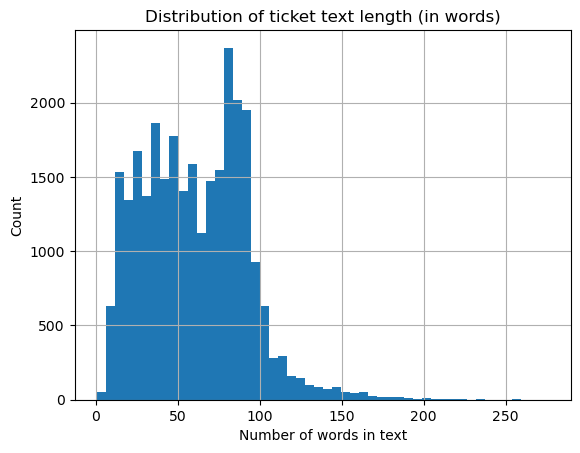

In [20]:
# --- Cell 8: text length statistics and simple histogram ---

import matplotlib.pyplot as plt

# Compute text length in characters and in words
df["n_chars"] = df["text"].str.len()
df["n_words"] = df["text"].str.split().str.len()

# Show basic statistics for these lengths
print(df[["n_chars", "n_words"]].describe())

# Plot a simple histogram of word counts
plt.figure()
df["n_words"].hist(bins=50)
plt.xlabel("Number of words in text")
plt.ylabel("Count")
plt.title("Distribution of ticket text length (in words)")
plt.show()


In [21]:
# --- Cell 9: train/validation/test split ---

from sklearn.model_selection import train_test_split

# Choose a label column to stratify on so that class distribution
# is similar across train/val/test (here we use 'queue')
label_for_split = "queue"

if label_for_split not in df.columns:
    raise ValueError(
        f"Label column '{label_for_split}' not found. "
        f"Available columns: {df.columns.tolist()}"
    )

# First split: original df -> train (70%) + temp (30%)
train_df, temp_df = train_test_split(
    df,
    test_size=0.3,               # 70% train, 30% temp
    random_state=42,             # for reproducibility
    stratify=df[label_for_split] # keep class balance across splits
)

# Second split: temp -> validation (15%) + test (15%)
val_df, test_df = train_test_split(
    temp_df,
    test_size=0.5,                    # 50% of 30% = 15% of total each
    random_state=42,
    stratify=temp_df[label_for_split] # again, stratify on the same label
)

len(train_df), len(val_df), len(test_df)


(19782, 4239, 4240)

In [22]:
# --- Cell 10: save processed splits to disk ---

PROCESSED_DIR = DATA_DIR / "processed"
PROCESSED_DIR.mkdir(parents=True, exist_ok=True)

train_path = PROCESSED_DIR / "tickets_train.csv"
val_path   = PROCESSED_DIR / "tickets_val.csv"
test_path  = PROCESSED_DIR / "tickets_test.csv"

# Save train/val/test splits as CSV files
train_df.to_csv(train_path, index=False)
val_df.to_csv(val_path, index=False)
test_df.to_csv(test_path, index=False)

train_path, val_path, test_path


(PosixPath('/Users/bestalex/Desktop/ntu lecture/CA6000/000_ai_support_tickets/data/processed/tickets_train.csv'),
 PosixPath('/Users/bestalex/Desktop/ntu lecture/CA6000/000_ai_support_tickets/data/processed/tickets_val.csv'),
 PosixPath('/Users/bestalex/Desktop/ntu lecture/CA6000/000_ai_support_tickets/data/processed/tickets_test.csv'))